In [5]:
#%%
import networkx as nx
import torch
import torch_geometric as pyg
import numpy as np
from torch_geometric.utils import from_networkx
import matplotlib.pyplot as plt
import scipy

# Cheetsheet



# Simple graphs

Simple graphs are graphs that represent symetrical relationships with other entities.

In graph terms, the edges are not directed and there are no self-loops

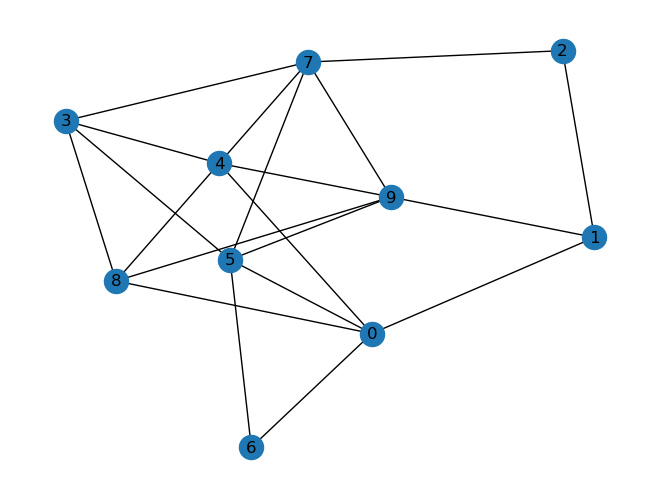

In [6]:
G = nx.gnm_random_graph(10,20)
pos = nx.kamada_kawai_layout(G)
nx.draw(G,pos,with_labels = True)

# Isomorphism

I have two networks, G and G' with the same number of nodes. I can map each node in G to a node in G' using a mapping function f(v) = v_G'.

Two v and u nodes being adjacent is shown as v \in N(u)

I can say two graphs are isomorphic, if and only if, for every pair of adjacent nodes v \in N(u) we also have f(v) in N(f(u))

[2, 12, 22, 32, 42, 52, 62, 72, 82, 92]


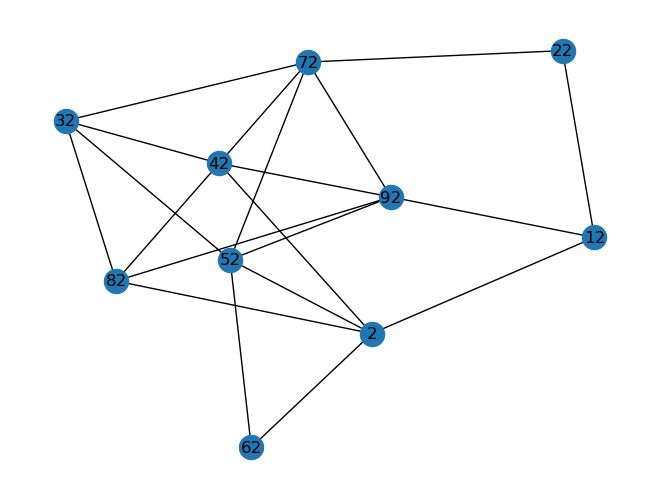

In [17]:
H = nx.Graph()
def map_nodes(G,H):
    Hnodes = []
    for node in G.nodes():
        
        new_node = node*10 +2
        Hnodes.append(new_node)

    H.add_nodes_from(Hnodes)
    print(H.nodes())


def map_edges(G,H):
    Hedges = []
    for edge in G.edges():
        new_edge = (edge[0]*10 +2 , edge[1]*10 +2)
        Hedges.append(new_edge)
    H.add_edges_from(Hedges)
map_nodes(G,H)
map_edges(G,H)
pos = nx.kamada_kawai_layout(H)
nx.draw(H,pos,with_labels = True)



# GNNs and the W-L isomentry test

The first instance of a message-passing based representation of a graph, was used as an isomorphism test (W).




In [20]:
print(nx.weisfeiler_lehman_graph_hash(G))
print(nx.weisfeiler_lehman_graph_hash(H))

6cfbc7752b15ff57eca90c6d631eb40c
6cfbc7752b15ff57eca90c6d631eb40c


[0.17106481 0.07361111 0.01736111 0.03101852 0.0587963  0.1412037
 0.         0.14861111 0.03009259 0.10601852]


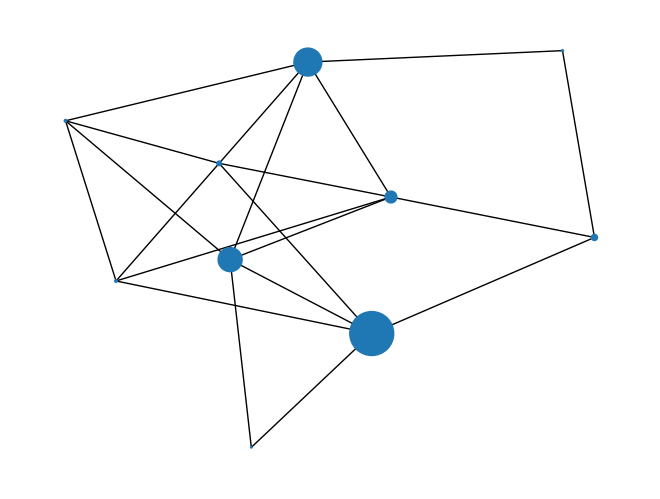

In [22]:
# %%
def plot_centrality(G, centrality):
    valid_cents = {'eig':nx.eigenvector_centrality_numpy, 
                   'btwns':nx.betweenness_centrality, 
                   'katz': nx.katz_centrality_numpy, 
                   'PageRank':nx.pagerank,
                   'closeness': nx.closeness_centrality,
                   'cfc':nx.current_flow_closeness_centrality,
                   'laplace':nx.laplacian_centrality}
    cents = np.array(list(valid_cents[centrality](G).values()))
    print(cents)
    cents_normalised = cents/max(cents)
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G,pos,node_size = np.power(10,3*cents_normalised) )
    plt.show()

plot_centrality(G,'btwns')

[0.32064199 0.35616671 0.23631086 0.34624977 0.43558948 0.27648202
 0.27413394 0.25532867 0.37594647 0.21620328]


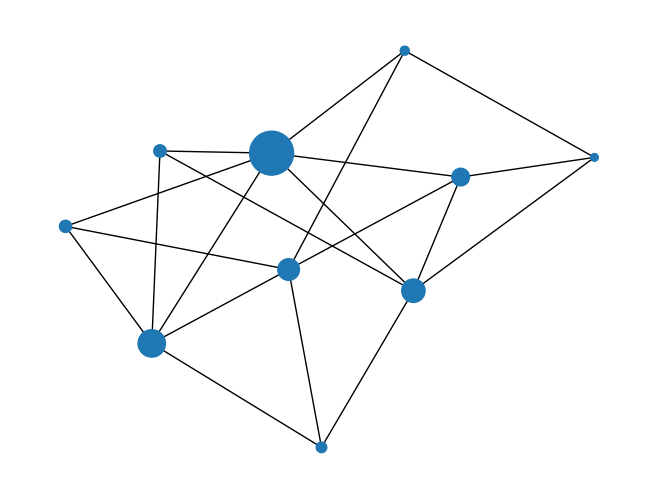

In [4]:
plot_centrality(G,'eig')